In [53]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import itertools
from skimage.io import imread

In [2]:
data = loadmat('ex7data1.mat')
X = data['X']

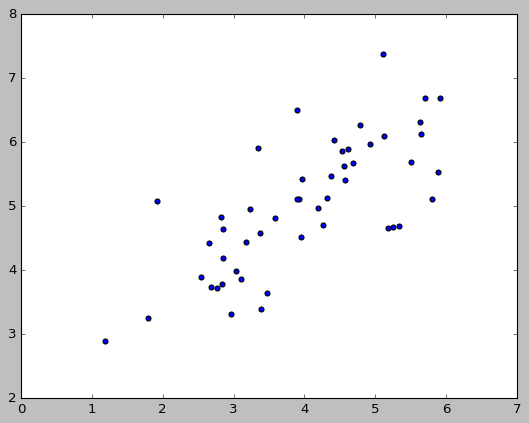

In [3]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [4]:
# normalize data
means = X.mean(axis=0)
stds = X.std(axis=0)
X_norm = X.copy()

for j in range(X.shape[1]):
    X_norm[:, j] = (X[:, j] - means[j]) / stds[j]

In [14]:
def pca(X):
    SIGMA = (1.0 / len(X)) * X.T.dot(X)
    (U, S, V) = np.linalg.svd(SIGMA)
    
    return (U, S)

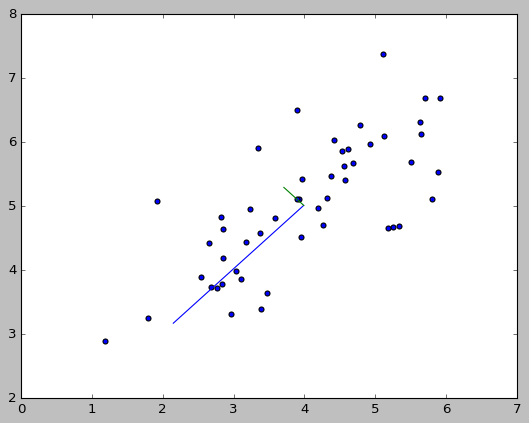

In [15]:
(U, S) = pca(X_norm)

y = means + 1.5 * S[0] * U[:, 0]
p1 = [means[0], y[0]]
p2 = [means[1], y[1]]
plt.plot(p1, p2)

y = means + 1.5 * S[1] * U[:, 1]
p1 = [means[0], y[0]]
p2 = [means[1], y[1]]
plt.plot(p1, p2)

plt.scatter(X[:, 0], X[:, 1])

plt.show()

In [24]:
# project the data in a lower dimensional space
def reduce_dimensions(X, U, k):
    U_reduce = U[:, :k]
    return U_reduce.T.dot(X.T)

In [25]:
Z = reduce_dimensions(X_norm, U, k=1)
print(Z)

[[ 1.49631261 -0.92218067  1.22439232  1.64386173  1.2732206  -0.97681976
   1.26881187 -2.34148278 -0.02999141 -0.78171789 -0.6316777  -0.55280135
  -0.0896816  -0.5258541   1.56415455 -1.91610366 -0.88679735  0.95607375
  -2.32995679 -0.47793862 -2.21747195  0.38900633 -1.78482346  0.05175486
   1.66512392  0.50813572 -1.23711018 -1.17198677  0.84221686 -0.00693174
  -0.22794195 -1.51309518  1.33874082 -0.5925244   0.67907605 -1.35298
   1.68749495 -1.39235931  2.55992598 -0.27850702 -0.97677692  0.88820006
   1.29666127 -0.98966774  1.81272352 -0.27196356  3.19297722  1.21299151
   0.36792871 -1.44264131]]


In [26]:
def recover_data(Z, U, k=1):
    U_reduce = U[:, :k]
    return U_reduce.dot(Z)

In [27]:
X_rec = recover_data(Z, U, k=1)
print(X_rec)

[[-1.05805279  0.65208021 -0.86577611 -1.16238578 -0.90030292  0.69071588
  -0.89718548  1.65567835  0.02120713  0.55275802  0.44666359  0.39088959
   0.06341447  0.371835   -1.10602429  1.35488989  0.62706042 -0.67604623
   1.64752825  0.33795364  1.56798945 -0.27506901  1.26206077 -0.03659622
  -1.17742041 -0.35930621  0.874769    0.82871979 -0.59553725  0.00490148
   0.1611793   1.06991986 -0.94663271  0.41897802 -0.48017928  0.95670134
  -1.19323912  0.98454671 -1.81014102  0.1969342   0.69068559 -0.62805228
  -0.91687797  0.69980077 -1.28178909  0.19230728 -2.25777584 -0.85771452
  -0.26016489  1.02010145]
 [-1.05805279  0.65208021 -0.86577611 -1.16238578 -0.90030292  0.69071588
  -0.89718548  1.65567835  0.02120713  0.55275802  0.44666359  0.39088959
   0.06341447  0.371835   -1.10602429  1.35488989  0.62706042 -0.67604623
   1.64752825  0.33795364  1.56798945 -0.27506901  1.26206077 -0.03659622
  -1.17742041 -0.35930621  0.874769    0.82871979 -0.59553725  0.00490148
   0.161179

In [29]:
data = loadmat('ex7faces.mat')
X = data['X']

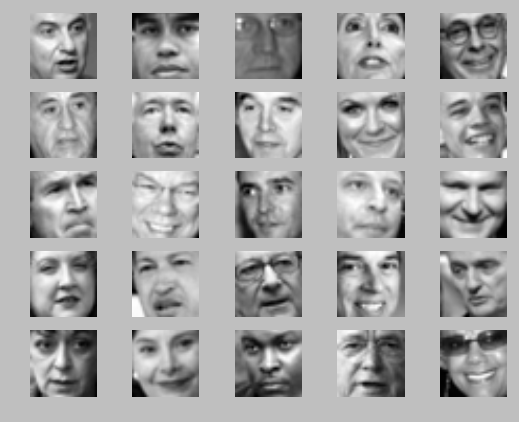

In [35]:
plot_indices = itertools.product(range(5), range(5))
images_indices = np.random.randint(0, 5000, size=25)

(f, ax) = plt.subplots(5, 5)
for (i, (j, k)) in zip(images_indices, plot_indices):
    image = X[i, :].reshape(32, 32).T
    ax[j, k].imshow(image, cmap='gray')
    ax[j, k].axis('off')
    
plt.show()

In [36]:
# normalize data
means = X.mean(axis=0)
stds = X.std(axis=0)
X_norm = X.copy()

for j in range(X.shape[1]):
    X_norm[:, j] = (X[:, j] - means[j]) / stds[j]

In [37]:
(U, S) = pca(X_norm)

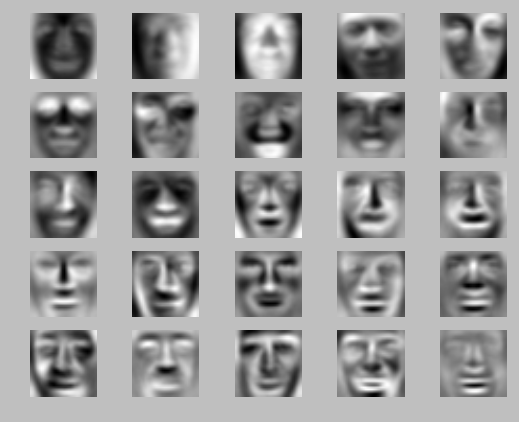

In [49]:
plot_indices = itertools.product(range(5), range(5))

(f, ax) = plt.subplots(5, 5)
for (i, (j, k)) in enumerate(plot_indices):
    image = U[:, i].reshape(32, 32).T
    ax[j, k].imshow(image, cmap='gray')
    ax[j, k].axis('off')
    
plt.show()

In [50]:
Z = reduce_dimensions(X_norm, U, k=100)
X_rec = recover_data(Z, U, k=100).T

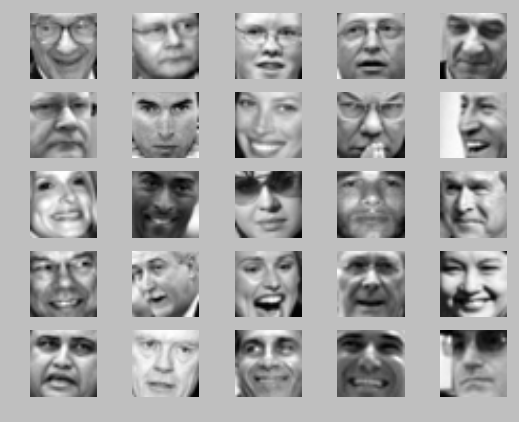

In [51]:
plot_indices = itertools.product(range(5), range(5))

(f, ax) = plt.subplots(5, 5)
for (i, (j, k)) in enumerate(plot_indices):
    image = X[i, :].reshape(32, 32).T
    ax[j, k].imshow(image, cmap='gray')
    ax[j, k].axis('off')
    
plt.show()

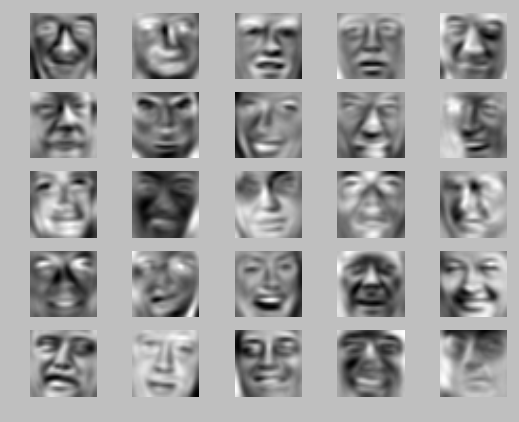

In [52]:
plot_indices = itertools.product(range(5), range(5))

(f, ax) = plt.subplots(5, 5)
for (i, (j, k)) in enumerate(plot_indices):
    image = X_rec[i, :].reshape(32, 32).T
    ax[j, k].imshow(image, cmap='gray')
    ax[j, k].axis('off')
    
plt.show()

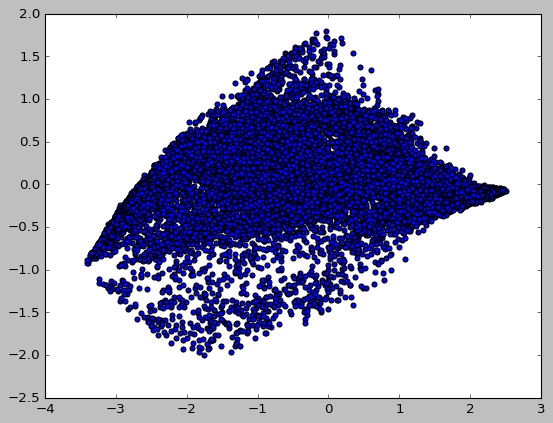

In [55]:
A = imread('bird_small.png').astype('float64')
A = A / 255.0
X = A.reshape(-1, 3)

# normalize data
means = X.mean(axis=0)
stds = X.std(axis=0)
X_norm = X.copy()

for j in range(X.shape[1]):
    X_norm[:, j] = (X[:, j] - means[j]) / stds[j]
    
(U, S) = pca(X_norm)
Z = reduce_dimensions(X_norm, U, k=2).T

plt.scatter(Z[:, 0], Z[:, 1])
plt.show()